In [68]:
import yfinance as yf
import plotly
import quandl
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta
%matplotlib inline
from IPython.display import Image
from IPython.core.display import HTML 

In [4]:
# Downloading the historical stock price from Yahoo Finance
NCLH = yf.download("NCLH", start = '2013-01-18', end = '2021-07-01', interval = '1d')
CCL = yf.download("CCL", start = '1978-07-24', end = '2021-07-01', interval = '1d')
# NCLH.head()
# CCL.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Norwegian Cruise Line 

Norwegian Cruise Line Holdings Ltd. engages in the provision of cruise travel services. It provides cruise experiences for travelers with itineraries in North America, Mediterranean, Baltic, Central America, Bermuda and Caribbean. It also offers an entirely inter-island itinerary in Hawaii. Its brands include Norwegian Cruise Line, Oceania Cruises, and Regent Seven Seas Cruises. The company was founded in 1966 and is headquartered in Miami, FL.gian Cruise Line Holdings Ltd. engages in the provision of cruise travel services. It provides cruise experiences for travelers with itineraries in North America, Mediterranean, Baltic, Central America, Bermuda and Caribbean. It also offers an entirely inter-island itinerary in Hawaii. Its brands include Norwegian Cruise Line, Oceania Cruises, and Regent Seven Seas Cruises. The company was founded in 1966 and is headquartered in Miami, FL.

<img src='http://gcaptain.com/wp-content/uploads/2013/01/ncl_Aerial_Breakaway_01-hires.jpg' width="800" height="400">

## Stock performance analysis:

### Company Valuation at IPO:

Norwegian Cruise Line priced shares of its initial public offering at $\$19$ per share on Jan.17.2013, and when it opened next day, the stock soared to over $\$25$. This Miami-based cruise company were priced at $\$19$ a share, which was a strong reception from investors. The deal raised $\$447$ million for the company in IPO and sold 23.52 million shares.  

| Ticker| IPO Share Price| Amount of Shares| Raised Capital|  Growth  at IPO | Enterprise Value|
|:-----:|:----------------:|:----------------:|:---------------:|:----------:|:---------------:|
| NCLH  | $\$19$ per share |   23.52 Million  | $\$447$ Million |30.47%      | $\$6.4$ Million

### Current Valuation on July 1, 2021:

| Current Share Price | Shares Outstanding|   Revenue      |Gross Profit        |Enterprise Value| Market Cap|
|:------------------:|:----------------:|:----------------:|:------------------:|:--------------:|:---------:|
|$\$29.51$ per share | 369.93 Million  | $\$36.13$ Million | $\$-413.15$ Million|$\$19.41$ Billion|$\$10.69$ Billion|

### Statistics from January 17, 2013 to July 1, 2021:

| Highest Price | Lowest Price |   Average Price  |
|:-------------:|:------------:|:----------------:|
|$\$63.76$ per share | $\$7.77$ per share | $\$42.374$ per share|

### Time series plot for NCLH:

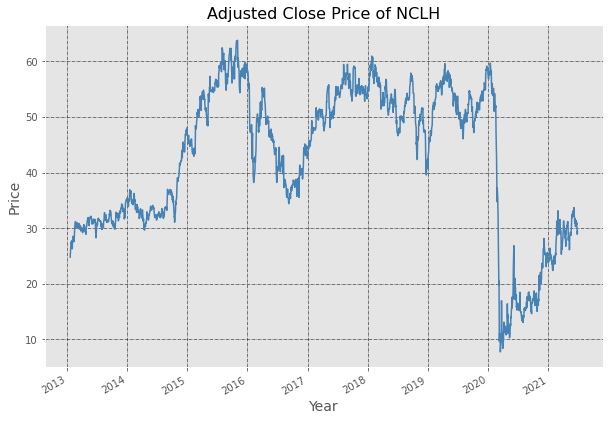

In [97]:
# Plot the adjusted close price of NCLH
NCLH['Adj Close'].plot(figsize=(10, 7), color = 'steelblue')
# Define the label for the title of the figure
ticker = 'NCLH'
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
# Show the plot
plt.show()

As can be seen in the line plot, the stock price(adjusted close price) for Norwegian Cruise Line was relatively stable for the first two years since its IPO. Then it soared to its highest point of $\$63.76$ per share. After the spike, there came the drop. Later on, it experienced some fluctuations ranging from $\$35$ to $\$60$ per share. By the end of the year 2019, it climbed to $\$60$ per share, which was pretty close to its peak. But unfortunately, the COVID-19 pandemic broke out. In the first three months of 2020, NCLH suffered a devastating drop from $\$60$ per share to its unprecedented lowest point of $\$7.77$ per share. The price has been recovering since then. It's raising gradually. The current stock price is about $\$30$ per share. If no other major discouragement happens, we can almost expect a new high in the near future.

### Moving Average (Rolling Mean) for NCLH

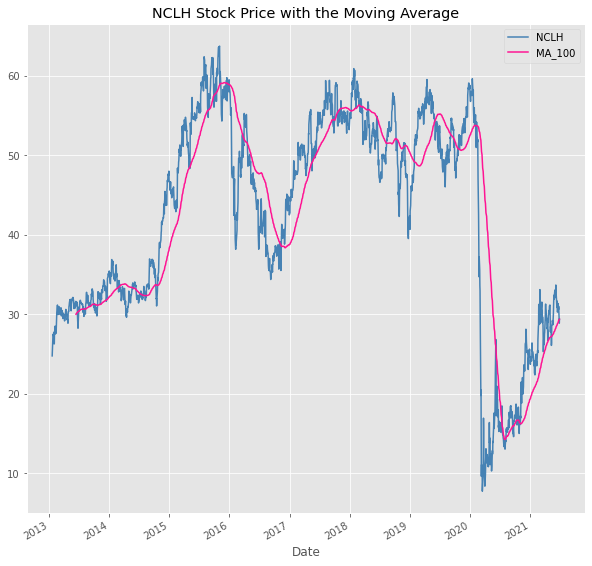

In [44]:
# Get the Moving Average (Rolling Mean) for NCLH (to determine the trend)
# Logically, we should buy the stocks are expericing downturn and sell when the stockes are expericing upturn. 
close_px_nclh = NCLH['Adj Close']
ma_nclh = close_px_nclh.rolling(window = 100).mean()

from matplotlib import style
import matplotlib as mpl
mpl.rc('figure', figsize=(10, 10))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px_nclh.plot(label='NCLH', color = 'steelblue', title = 'NCLH Stock Price with the Moving Average')
ma_nclh.plot(label='MA_100', color = 'deeppink')
plt.legend()

The moving average (Rolling mean) smooths out price data by creating a constantly updated average price. It cuts down 'noise' in our price chart and provides us a moving trend of stocks. We could expect it will follow the trend and less likely to deviate outside its resistance point. 

In this chart, the moving average showcases an increasing trend after experiencing the devastating drop due to the COVID-19 pandemic. Starting from March 2020 till now, the pink line displays a positive linear trend and has a deep slope. It means that the stock price is increasing and will continue to climb in the short near future.

### Return rate

<AxesSubplot:title={'center':'Return rate for NCLH'}, xlabel='Date'>

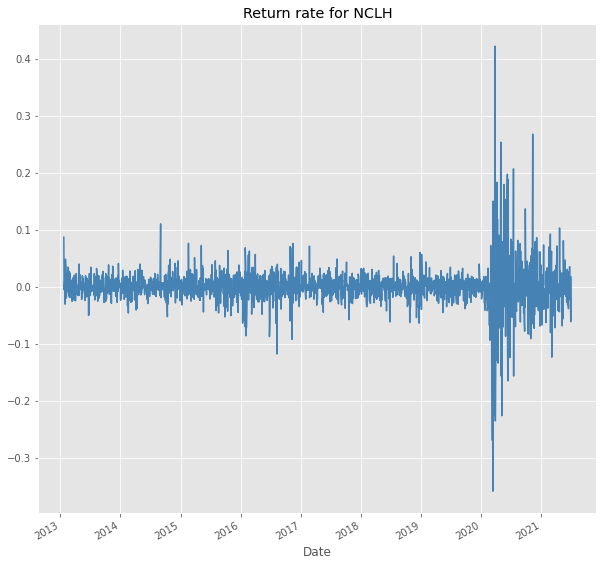

In [45]:
# Get the return deviation to determine risk and return
# Ideal stocks should return as high and stable as possible
# As a risk averse person, avoiding the 35% drop in the early 2020.
rets_nclh = close_px_nclh / close_px_nclh.shift(1) -1
rets_nclh.plot(label = 'Return', color = "steelblue", title = "Return rate for NCLH")

The return rate measures the expected value of the probability distribution of investment returns. We use it to determine risk and return. Logically, our ideal stock should return as high and stable as possible. However, people have different investment appetites and different sentiments for a certain stock, so the decision is really up to you.

As a risk-averse person, I would avoid this stock in early 2020 as you could see a 35% drop during this time period. Although it soon experienced a huge spike (a 40% increase), I still think it was too risky to invest due to its huge fluctuations. Now, the fluctuation is gradually subsided. Whether to buy or sell the stock, we still need to refer to other plots as well. 


### Rolling Volatility

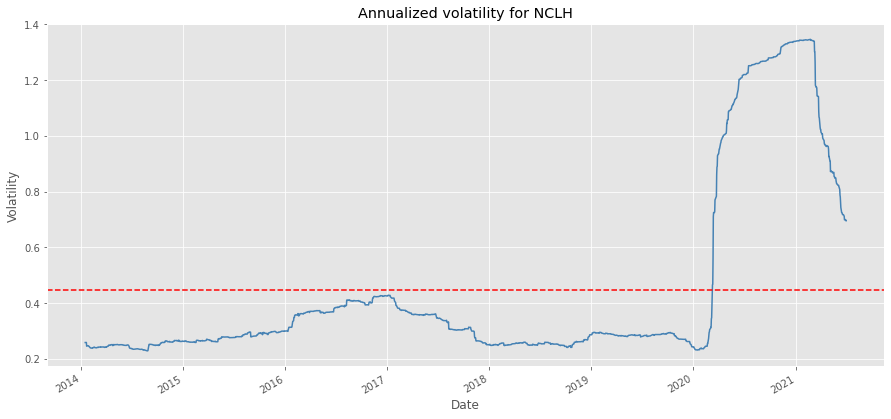

In [46]:
# Calculating the Annualized volatility for NCLH
# The trading days is set to 252 days
'''
Volitility measures the dispersion of returns over a certain time period.
It goes higher when the security gets riskier since the asset price changes dramatically during that period of time.
'''
Trading_days = 252
returns = np.log(NCLH['Close']/NCLH['Close'].shift(1))
returns.fillna(0, inplace=True)
volatility = returns.rolling(window=Trading_days).std()*np.sqrt(Trading_days)
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
volatility.plot(ax=ax1,color = "steelblue")
plt.axhline(y=volatility.mean(), color='r', linestyle='--')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility')
ax1.set_title('Annualized volatility for NCLH')
plt.show()

Volatility measures the dispersion of returns (degree of variability) over a certain period. It's derived from historical price data of the security over predetermined periods. Here, I used the annualized volatility which is a calculation of the standard deviation of logarithm annual returns. The red dash line represents its average volatility.

As volatility goes higher, the security goes riskier because the asset price changes dramatically and fluctuates. As shown in the plot, from the year 2020 to 2021, the annualized volatility for this security soared from 0.25 to 1.35. It far deviated from the average volatility. It means that it was highly risky for people to invest at this point. Starting from this year, volatility began to drop, and we hope it could drop below the red line. 

### Sharpe ratio

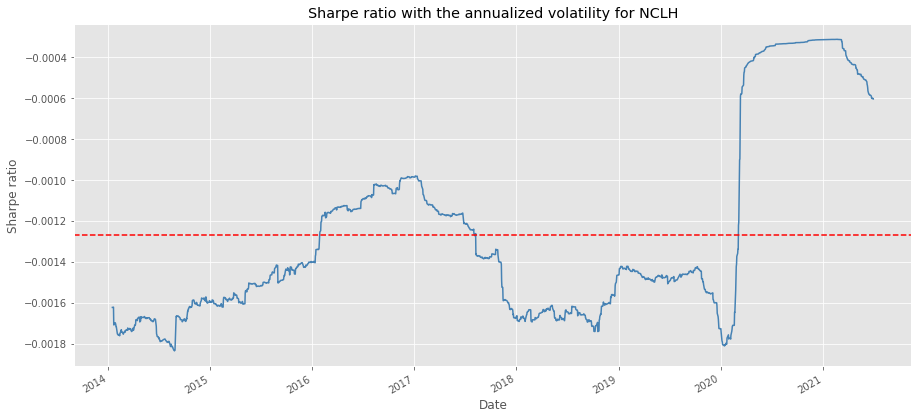

In [47]:
# Get the sharpe_ratio for NCLH
'''
Sharpe ratio measures the return of the security compared to its risk.
Sharpe Ratio = (Return of Portfolio – Risk-Free Return) / Std Dev of Portfolio
'''
sharpe_ratio = (returns.mean()-0.0005)/volatility
sharpe_ratio.tail()
fig = plt.figure(figsize=(15, 7))
ax3 = fig.add_subplot(1, 1, 1)
sharpe_ratio.plot(ax=ax3, color = "steelblue")
plt.axhline(y=sharpe_ratio.mean(), color='r', linestyle='--')
ax3.set_xlabel('Date')
ax3.set_ylabel('Sharpe ratio')
ax3.set_title('Sharpe ratio with the annualized volatility for NCLH')
plt.show()

Sharpe ratio measures the total performance of the asset. It indicates how well an equity performs in comparison to the rate of return on a risk-free investment. In other words, it tells us how much return we could achieve per each unit of risk. A value between 0 and 1 signifies that the returns derived are better than the risk-free rate. 

In my calculation, I used a three month Treasury Bill Rate, which was 0.05% on July 1,2021. As the plot shows, its sharpe ratio has always been below 0. It means that its return rate has always been below the risk-free rate. 

# Carnival Cruise Line

Carnival Cruise Line is an international cruise line with headquarters in Doral, Florida. It is a subsidiary of Carnival Corporation & plc. Its logo is the funnel, like the funnels found on its ships, with red, white, and blue colors. The funnels are shaped like a whale's tail. Carnival is ranked first on the list of largest cruise lines based on passengers carried annually and total number of ships in fleet.

<img src='https://upload.wikimedia.org/wikipedia/commons/3/34/Carnival_glory3.jpg' width="800" height="400">

## Stock performance analysis:

### Company Valuation at IPO:

 On July 31, 1987, Carnival Crop completed its initial public offering of 20% of its common stock on the New York Exchange with a price of $\$3.875$ per share. It raised approximately $\$400$ million in capital. The capital raised was used to finance acquisitions.  

| Ticker | IPO Share Price| Amount of Shares| Raised Capital|Growth  at IPO |Enterprise Value|
|:------:|:----------------:|:----------------:|:---------------:|:----------:|:---------------:|
| CCL  | $\$3.875$ per share | 20% of its common stock | Approx $\$400$ Million | -1.61% | $\$2.11$ Billion

### Current Valuation on July 1, 2021:

| Current Share Price | Shares Outstanding|   Revenue      |Gross Profit        |Enterprise Value|    Market Cap   |
|:------------------:|:----------------:|:----------------:|:------------------:|:--------------:|:----------------:|
|$\$29.51$ per share | 973.83 Million  | $\$140$ Million | $\$834$ Million|$\$53.49$ Billion     | $\$30.52$ Billion|

### Statistics from July 31, 1987 to July 1, 2021:

| Highest Price | Lowest Price |   Average Price  |
|:-------------:|:------------:|:----------------:|
|$\$66.22$ per share | $\$1.03$ per share | $\$22.83$ per share|

### Historical performance:

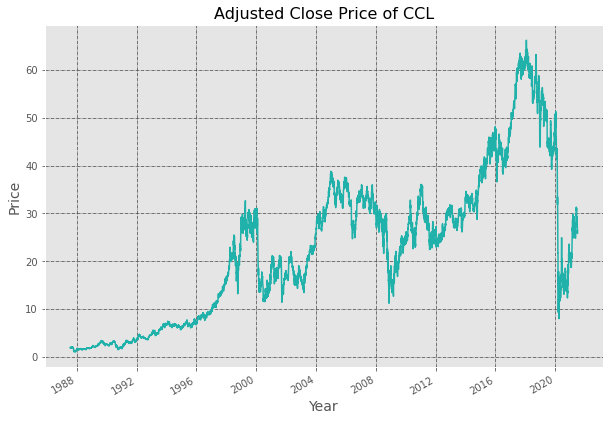

In [11]:
# Plot the adjusted close price of CCL
CCL['Adj Close'].plot(figsize=(10, 7), color = 'lightseagreen')
ticker = 'CCL'
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

As the line plot shows, the stock price for Carnival Cruise Line experienced several ups and downs. It has its first high in the late 1990s, then followed by a sudden drop from $\$30$ per share to $\$12$ per share due to the dot-com stock market crash. After that, it resumed and even surpassed the previous highest point. Later on, the 2008 financial crisis happened, CCL suffered from a huge drop. But since then, it went up steadily and reached its highest point at the price of $\$66.62$ per share. However, without any surprise, due to the coronavirus explosion that happened in early 2020, CCL dropped to its unprecedented low from $\$50$ per share to $\$12.11$ per share. Now, the stock price is steadily increasing, but whether it will be back to its climax, we'll have to see.

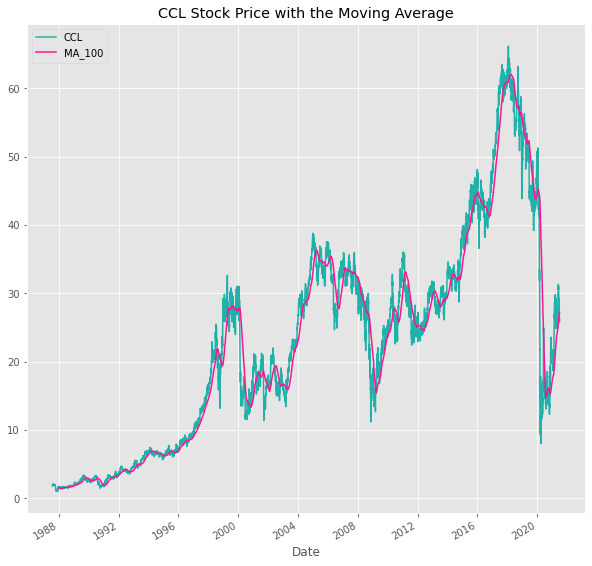

In [48]:
# Moving Average (Rolling Mean) for CCL (to determine the trend)
close_px_ccl = CCL['Adj Close']
ma_ccl = close_px_ccl.rolling(window = 100).mean()

mpl.rc('figure', figsize=(10, 10))
mpl.__version__
style.use('ggplot')
close_px_ccl.plot(label='CCL', color = 'lightseagreen', title = 'CCL Stock Price with the Moving Average')
ma_ccl.plot(label='MA_100', color = 'deeppink')
plt.legend()

Before the COVID-19 pandemic, in spite of two major drops that happened in the year of 2000 and 2008, CCL's general trend is increasing. When it first came to public, its share price was $\$3.875$ per share. And in year 2018, it reached its highest point at the price of $66.62. It had increased 1619% in 30 years. Although it experienced downfall during COVID-19, its price is increasing drastically after that. As the positive linear moving average line indicates, it may have a new high in the near future. 

### Return rate 

<AxesSubplot:title={'center':'Return rate for CCL'}, xlabel='Date'>

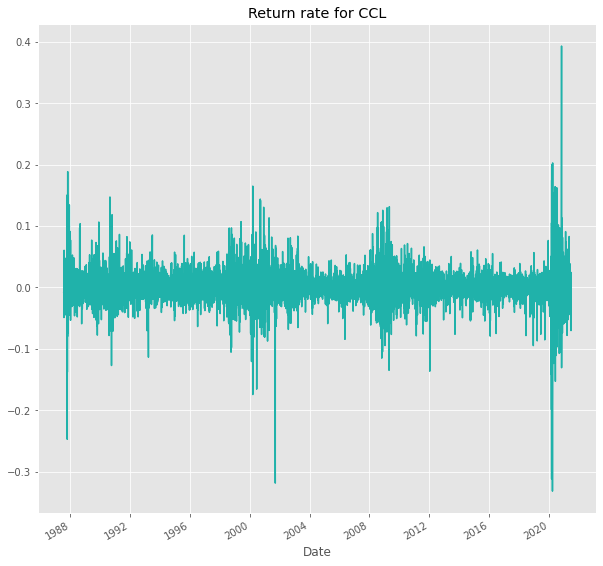

In [49]:
# Get the return deviation to determine risk and return
rets_ccl = close_px_ccl / close_px_ccl.shift(1) -1
rets_ccl.plot(label = 'Return', color = "lightseagreen", title = "Return rate for CCL")

As can be seen from this plot, CCL experienced several major drops since its IPO. The most recent drop happened in early 2020 and there was a huge spike afterward. As mentioned in the previous analysis, we would like to pursue a high and stable return rate. This was not the case for this stock. It was very unstable and fluctuated drastically at this moment. But now, since we're walking out of the epidemic stage and going towards the control stage, the fluctuation of the stock price will also subside.

### Rolling Volatility

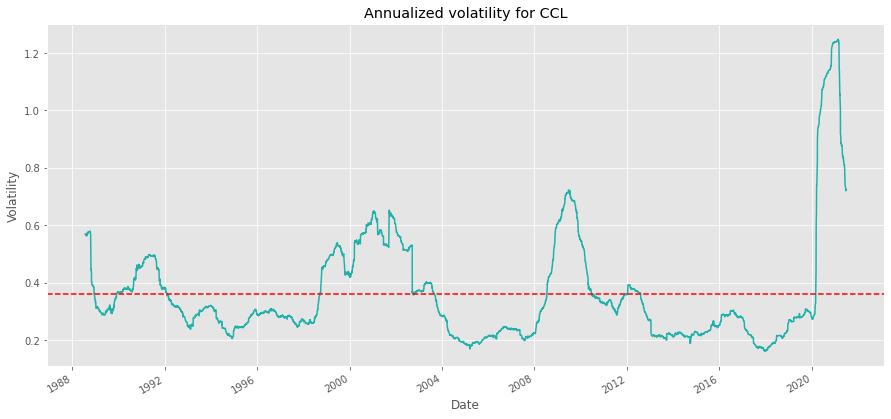

In [50]:
# Calculate the rolling volatility for CCL
returns = np.log(CCL['Close']/CCL['Close'].shift(1))
returns.fillna(0, inplace=True)
volatility = returns.rolling(window=Trading_days).std()*np.sqrt(Trading_days)
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
volatility.plot(ax=ax1, color = "lightseagreen")
plt.axhline(y=volatility.mean(), color='r', linestyle='--')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volatility')
ax1.set_title('Annualized volatility for CCL')
plt.show()

As volatility goes higher, the security goes riskier because the asset price changes dramatically and fluctuates. According to this plot, from the year 2020 to 2021, the annualized volatility for this security soared from 0.25 to 1.25. It far deviated from the average volatility. It means that it was highly risky for people to invest at this point. Starting from this year, volatility began to drop, and we hope it could drop below the red line. 

### Sharpe ratio

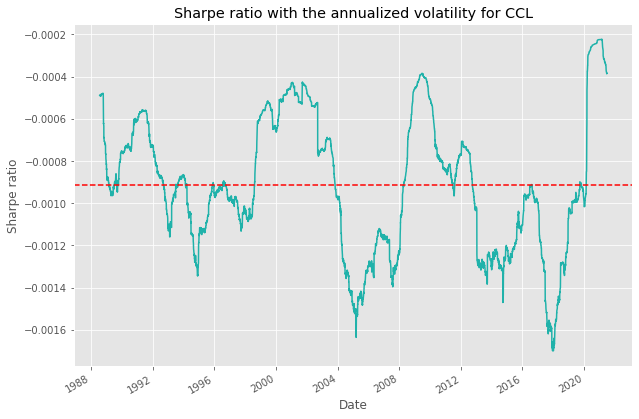

In [93]:
# Get the sharpe_ratio for CCL
sharpe_ratio = (returns.mean()-0.0005)/volatility
sharpe_ratio.tail()
fig = plt.figure(figsize=(10, 7))
ax2 = fig.add_subplot(1, 1, 1)
sharpe_ratio.plot(ax=ax2, color = "lightseagreen")
plt.axhline(y=sharpe_ratio.mean(), color='r', linestyle='--')
ax2.set_xlabel('Date')
ax2.set_ylabel('Sharpe ratio')
ax2.set_title('Sharpe ratio with the annualized volatility for CCL')
plt.show()

This plot shows that the Sharpe ratio for CCL has always been below 0 since its IPO. It means that its return rate has always been below the risk-free rate. 

# Comparison between NCLH, CCL and NDAQ

In [69]:
# Extract the data from quandl and create a datafram
tickers_list = ['NCLH', 'CCL','NDAQ']
# Import pandas
comparison = pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
 comparison[ticker] = quandl.get('WIKI/' + ticker)['Adj. Close']
# Print first 5 rows of the data
comparison.head()

,NCLH,CCL,NDAQ
Date,,,
2013-01-18,24.790,34.132606,25.040241
2013-01-22,26.950,33.999898,25.382676
2013-01-23,27.490,34.212231,25.271915
2013-01-24,27.345,34.415718,25.391906
2013-01-25,27.350,34.610357,25.567277


## Historical stock performance:

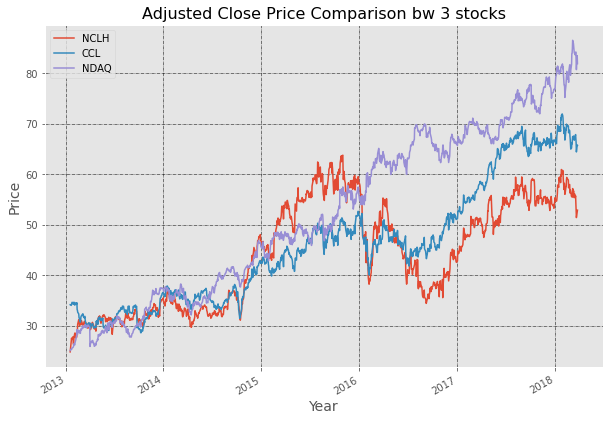

In [70]:
# Plot all the adj. close prices
comparison.plot(figsize=(10, 7))
plt.legend()

# Define the label for the title 
plt.title("Adjusted Close Price Comparison bw 3 stocks", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

Since I used the Quandl platform to acquire the dataset, it only available till March 27, 2018. Therefore, I could only do the analysis from 2013 to 2018. The purple line represents the Nasdaq index, which is the market capitalization-weighted index of over 2,500 common equities listed on the Nasdaq stock exchange. In other words, it represents the market. 

As shown in the plot, within this time period, the Nasdaq index displays a positive linear trend. From 2013 to 2015, three stocks displayed a similar pattern. After 2015, NCLH had a better performance than the Nasdaq index, while CCL had slightly worse performance. But since 2016, both stocks performed worse than the Nasdaq index.

## Risk and Return Comparison

In [71]:
corr = comparison.corr()
corr

,NCLH,CCL,NDAQ
NCLH,1.000000,0.814269,0.720270
CCL,0.814269,1.000000,0.924496
NDAQ,0.720270,0.924496,1.000000


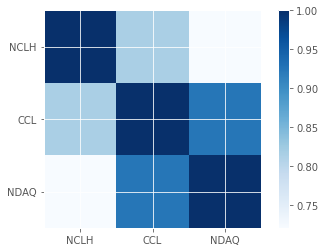

In [76]:
# Correlation Map bw NCLH, CCL and NDAQ
plt.imshow(corr, cmap='Blues', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

The correlation map can indicate the linear relationship between the three stocks. The darker color means that the two stocks have a stronger linear relationship, while the lighter color means the opposite. From the correlation table, we can know that the correlation between NCLH and CCL is 0.814269, which means that they have a strong association. As one increases/decreases, the other one would have a similar impact. Additionally, we can know that compared to the relationship between CCL and NDAQ, NCLH has a stronger linear relationship with NDAQ. It indicates that when the Nasdaq index changes, NCLH suffers more than CCL. But generally speaking, both stocks have a pretty close association with the Nasdaq since both correlations are above 0.5.

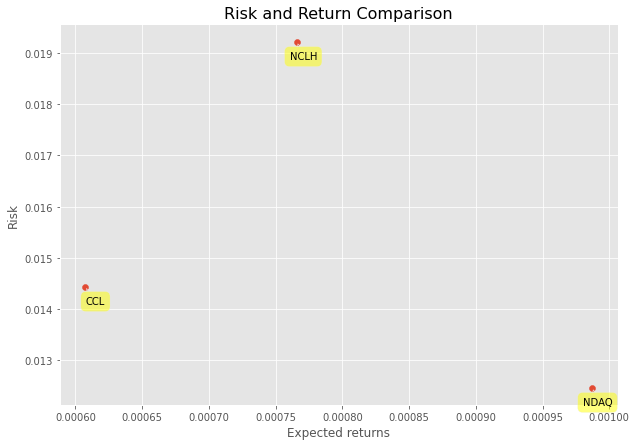

In [92]:
retscomp = comparison.pct_change()
plt.figure(figsize=(10, 7))
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.title("Risk and Return Comparison", fontsize=16)
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))


In this scatter plot, I put the expected return of the stock on the X-axis, the Risk rate on the Y-axis, and put labels on each of the stocks. It clearly displays the expected return and the risk of every stock. Usually, an ideal stock has a low-risk rate and high expected returns since we would like to minimize the risk and maximize the return. In addition, we could draw a linear line on the plot based on our investment appetite and risk tolerance. We could create our own rules to buy the stocks below the line and sell the stocks above the line. This line showcases the expected value threshold and the baseline for our buy/sell decision.

## Volatility Comparison

In [87]:
from pandas_datareader import data as pdr
import yfinance as yf
import datetime
yf.pdr_override() 
date_from = datetime.date(2013, 1, 18)
date_to = datetime.date(2021, 6, 28)
# pdr.get_data_yahoo('NCLH',date_from,date_to )

In [88]:
tickers = ['NCLH', 'CCL', 'NDAQ']
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map(data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))
               
all_data = get(tickers, date_from,date_to )

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


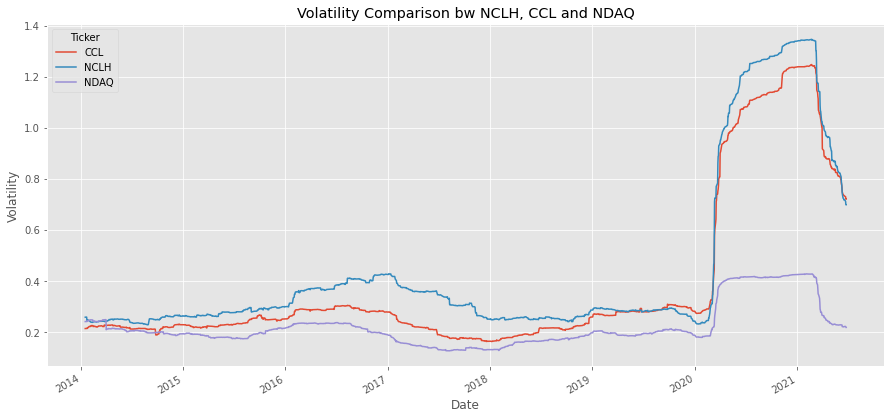

In [95]:
df = all_data.copy()
closePrice = df[['Close']]
closePrice = closePrice.reset_index()
closePriceTable = closePrice.pivot(index='Date', columns='Ticker', values='Close')
closePriceTable.tail()

# Computing volatility for three stocks
Trading_days = 252
returns_portfolio = np.log(closePriceTable/closePriceTable.shift(1))
returns_portfolio.fillna(0, inplace=True)
volatility_portfolio = returns_portfolio.rolling(window=Trading_days).std()*np.sqrt(Trading_days)
volatility_portfolio.tail()

fig = plt.figure(figsize=(15, 7))
ax3 = fig.add_subplot(1, 1, 1)
volatility_portfolio.plot(ax=ax3)
ax3.set_xlabel('Date')
ax3.set_ylabel('Volatility')
ax3.set_title('Volatility Comparison bw NCLH, CCL and NDAQ')
plt.show()

As can be seen from the plot, the volatility of the Nasdaq index is the most stable and remains the lowest among the three stocks. Since it represents 2,500 common equities on the Nasdaq stock exchange, we expect it to be stable and lower than an individual stock. When the pandemic came in early 2020, the stock market was all negatively impacted. The volatility for the Nasdaq index increased from 0.2 to 0.4, while the volatility for the other two stocks soared from 0.3 to above 1.25. Starting from this year, volatility for both stocks began to drop and we expect them to get closer to the purple line.

## Sharpe Ratio Comparison

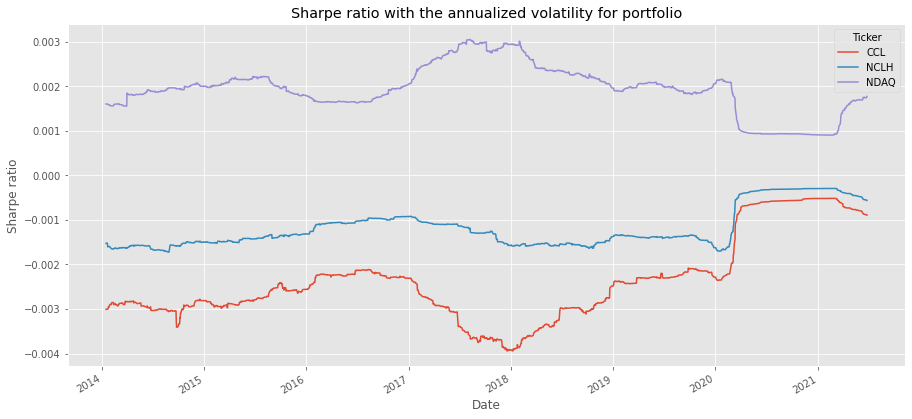

In [96]:
# Computing Sharpe Ratio for 3 stocks
'''
A high Sharpe ratio is good when compared to security similar with lower returns.
'''
sharpe_ratio_portfolio = (returns_portfolio.mean()-0.0005)/volatility_portfolio
sharpe_ratio_portfolio.tail()
fig = plt.figure(figsize=(15, 7))
ax4 = fig.add_subplot(1, 1, 1)
sharpe_ratio_portfolio[sharpe_ratio_portfolio.columns[sharpe_ratio_portfolio.columns != 'JWN']].plot(ax=ax4)
ax4.set_xlabel('Date')
ax4.set_ylabel('Sharpe ratio')
ax4.set_title('Sharpe ratio with the annualized volatility for portfolio')
plt.show()

As the above plot shows, since 2014, the Sharpe ratio of the Nasdaq index has always been above 0 and the Sharpe ratio of the other two stocks has always been below 0. It means that the return rate for the Nasdaq index is higher than the risk-free rate, while the return rate for the other two stocks is lower.

In other words, investing in the stock market, you may get higher return than investing a risk-free treasury bill. However, if you pick the stocks whose Sharpe ratio is always below 0, then you'd better invest a risk-free treasury bill to avoid losing money. Be careful when picking stocks and do your research!!! 